<a href="https://www.kaggle.com/code/ziadhamadafathy/house-pricesing-linearregression-decisiontree?scriptVersionId=96068061" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.feature_selection import SelectPercentile, chi2 
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
from sklearn.tree import DecisionTreeRegressor
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Preparing data and Cleaning it

In [2]:
df = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
#df.isnull().sum()
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [6]:
df.drop(columns=['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], inplace=True)

In [7]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [8]:
df.shape

(1460, 75)

In [9]:
for i in null_columns:
    print(i, df.dtypes[i])

LotFrontage float64
MasVnrType object
MasVnrArea float64
BsmtQual object
BsmtCond object
BsmtExposure object
BsmtFinType1 object
BsmtFinType2 object
Electrical object
GarageType object
GarageYrBlt float64
GarageFinish object
GarageQual object
GarageCond object


In [10]:
mean_values = df[['LotFrontage','MasVnrArea', 'GarageYrBlt']].mean()
df[['LotFrontage','MasVnrArea', 'GarageYrBlt']] = df[['LotFrontage','MasVnrArea', 'GarageYrBlt']].fillna(value=df[['LotFrontage','MasVnrArea', 'GarageYrBlt']].mean())

In [11]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

MasVnrType       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [12]:
df.dropna(axis=0, inplace = True)

In [13]:
#to collect the data which is object
object_data = df.select_dtypes(include=['object'])
#to convert data of object type to numbers
la = preprocessing.LabelEncoder()
for i in range(object_data.shape[1]):
    object_data.iloc[:, i] = la.fit_transform(object_data.iloc[:, i])

#concat between data none object and data object after convert it
num_data = df.select_dtypes(exclude=['object'])
data = pd.concat([object_data, num_data], axis=1)


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [14]:
data.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,3,1,3,3,0,4,0,5,2,2,...,0,61,0,0,0,0,0,2,2008,208500
1,3,1,3,3,0,2,0,24,1,2,...,298,0,0,0,0,0,0,5,2007,181500
2,3,1,0,3,0,4,0,5,2,2,...,0,42,0,0,0,0,0,9,2008,223500
3,3,1,0,3,0,0,0,6,2,2,...,0,35,272,0,0,0,0,2,2006,140000
4,3,1,0,3,0,2,0,15,2,2,...,192,84,0,0,0,0,0,12,2008,250000


# Correlation among features

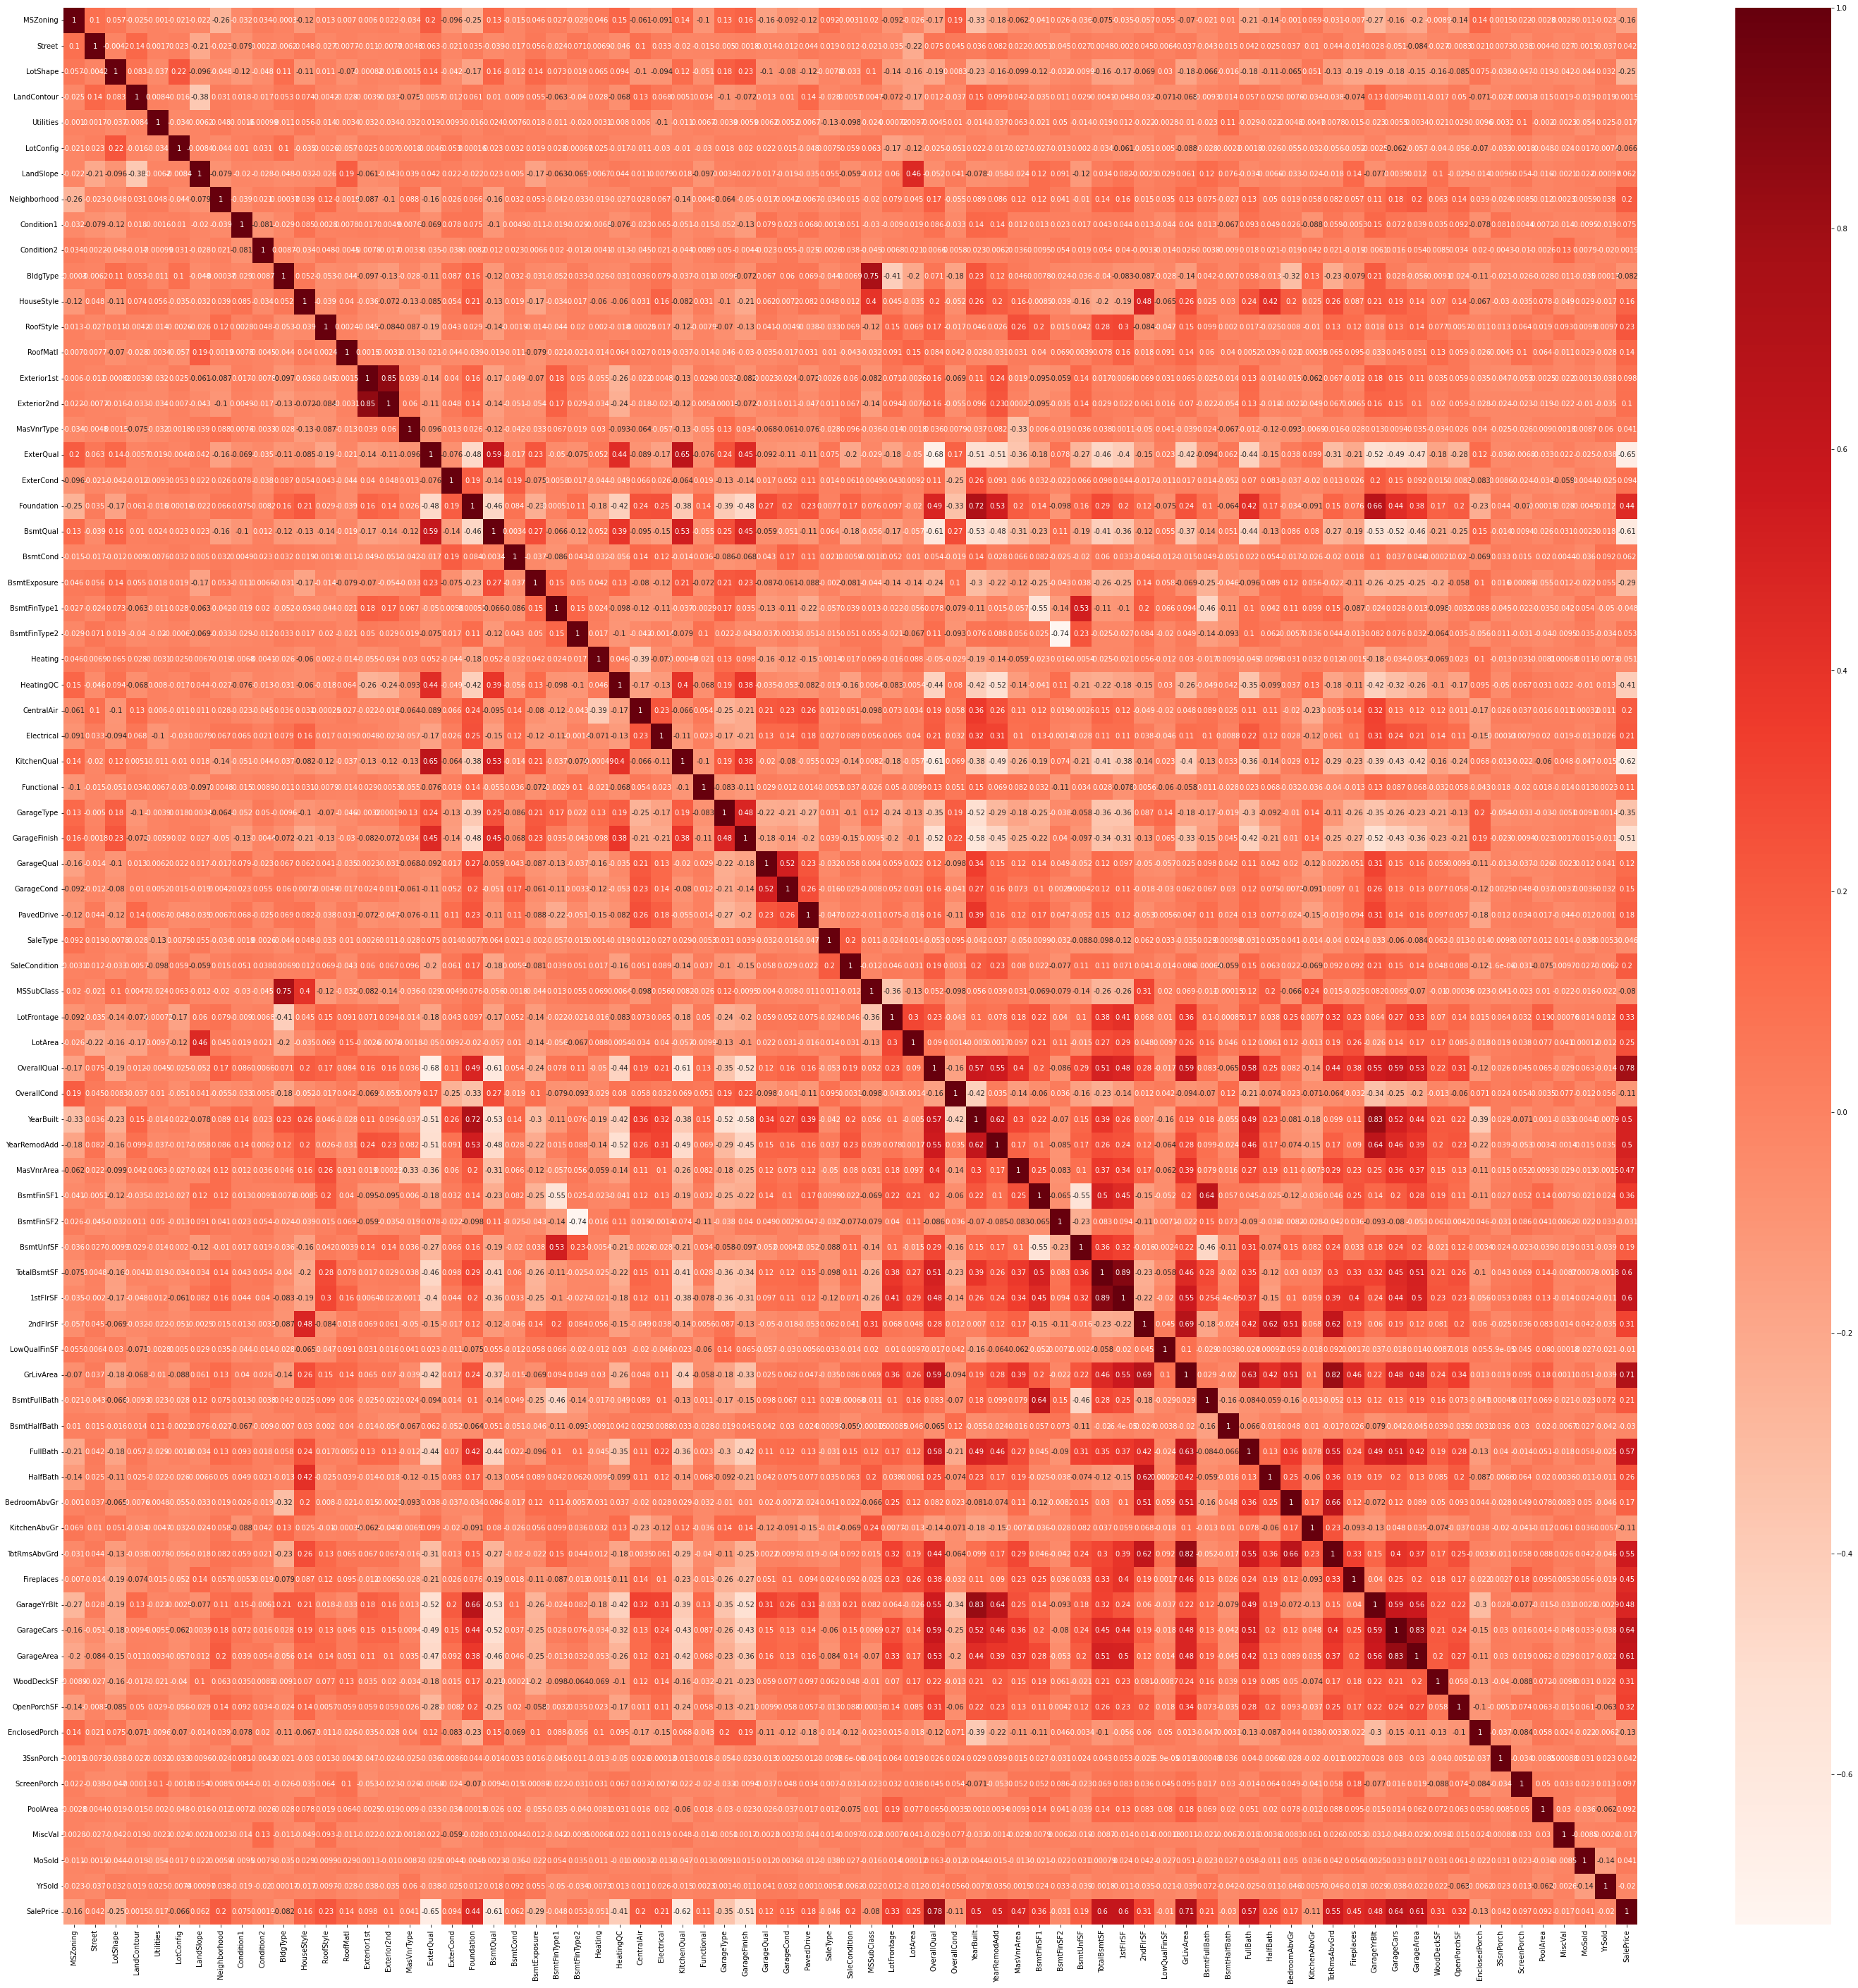

In [15]:
plt.figure(figsize=(50,50))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Make Polynomial Features

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2, interaction_only=True)
output_nparray = poly.fit_transform(data)
target_feature_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(df.columns, p) for p in poly.powers_]]
output_df = pd.DataFrame(output_nparray, columns=target_feature_names)

# Spliting data

In [17]:
x = output_df.iloc[:, :-1]
y = output_df.iloc[:, -1]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=44, shuffle =True)

# LinearRegression Model

In [19]:
LinearRegressionModel = LinearRegression()
LinearRegressionModel.fit(X_train, y_train)

LinearRegression()

In [20]:
print('Linear Regression Train Score is : ' , LinearRegressionModel.score(X_train, y_train))
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_test, y_test))
print('Linear Regression Coef is : ' , LinearRegressionModel.coef_)
print('Linear Regression intercept is : ' , LinearRegressionModel.intercept_)


Linear Regression Train Score is :  1.0
Linear Regression Test Score is :  0.999822129084973
Linear Regression Coef is :  [ 3.11480871e-04 -1.70149412e-01  5.94807973e-02 ... -1.35854181e-02
  5.35393740e+00 -7.32552627e-02]
Linear Regression intercept is :  -119988911.31510365


In [21]:
y_pred_linear = LinearRegressionModel.predict(X_test)

In [22]:
print('Y predict: ',y_pred_linear[:5])
print('Y test: ', y_test[:5])

Y predict:  [6.53889260e+08 6.04340321e+08 2.45363141e+08 2.20733091e+08
 4.92138165e+08]
Y test:  440     653956000.0
1202    606114000.0
820     246660300.0
730     220880000.0
78      491960000.0
Name: SaleCondition^1xSalePrice^1, dtype: float64


# DecisionTreeRegressor Model

In [23]:
DecisionTreeRegressorModel = DecisionTreeRegressor(max_depth = 4, random_state=33)
DecisionTreeRegressorModel.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=33)

In [24]:
print('Linear Regression Train Score is : ' , DecisionTreeRegressorModel.score(X_train, y_train))
print('Linear Regression Test Score is : ' , DecisionTreeRegressorModel.score(X_test, y_test))
print('Linear Regression Coef is : ' , LinearRegressionModel.coef_)
print('Linear Regression intercept is : ' , LinearRegressionModel.intercept_)

Linear Regression Train Score is :  0.9913043993183
Linear Regression Test Score is :  0.9872896649166406
Linear Regression Coef is :  [ 3.11480871e-04 -1.70149412e-01  5.94807973e-02 ... -1.35854181e-02
  5.35393740e+00 -7.32552627e-02]
Linear Regression intercept is :  -119988911.31510365


In [25]:
y_pred_decison = DecisionTreeRegressorModel.predict(X_test)

In [26]:
print('Y predict: ',y_pred_decison[:5])
print('Y test: ', y_test[:5])

Y predict:  [6.27432597e+08 6.27432597e+08 2.64573839e+08 2.23701476e+08
 4.95866356e+08]
Y test:  440     653956000.0
1202    606114000.0
820     246660300.0
730     220880000.0
78      491960000.0
Name: SaleCondition^1xSalePrice^1, dtype: float64


In [27]:
pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv').to_csv('my_output.csv')